##**Utsav Jitendrabhai Patel,**


In [28]:
#Importing libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('dark_background')
import pandas as pd
from IPython import display
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [29]:
#Importing google drive path
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
#Importing csv file
path = "/content/drive/MyDrive/Assign06/Student-Pass-Fail-Data.csv"
df = pd.read_csv(path)

In [31]:
#Displaying data
df

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0
...,...,...,...
995,6,22,1
996,9,30,1
997,3,39,0
998,7,25,1


In [32]:
#Displaying first 5 raws
df.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [34]:
#Checking that dataset has null values
print(df.isnull().sum())

Self_Study_Daily    0
Tution_Monthly      0
Pass_Or_Fail        0
dtype: int64


In [35]:
#Data preprocessing and splitting into training and testing the data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [36]:
#Training the logistic regression classifier
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [37]:
#Making prediction of classifier of testing
y_pred = classifier.predict(X_test)

In [38]:
#Finding accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.955


##Generating confusion matrix

In [39]:

font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

In [40]:
#Importing library
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [41]:
#Creating confusion matrix

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print(cm_df)


                 Predicted Negative  Predicted Positive
Actual Negative                  89                   9
Actual Positive                   0                 102


<AxesSubplot:>

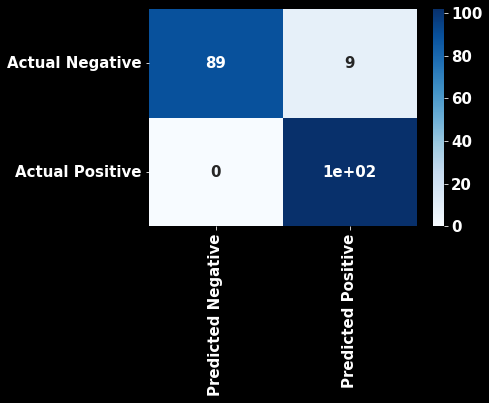

In [42]:
#Creating confusion matrix in diagram

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

sns.heatmap(cm_df, annot=True, cmap='Blues')


In [43]:
#Creating variable called metrics for accuracy, precision, recall and F1-score.
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})

In [44]:
#Displaying accuracy, precision, recall and F1-score
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.955,0.959459,0.954082,0.954809
